# Projeto final

Bem vindo ao projeto final do curso/módulo de Pandas.
Neste projeto, você deve responder a um conjunto de perguntas feitas a dois conjuntos de dados:

1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [1]:
from IPython.display import display
import pandas as pd
import matplotlib as mp
import numpy as np

aux = pd.DataFrame()

def get_compact_df(path, dropcols=[], clearna=['any', 'all'], decimal='.'):
    """ Função para importar um DataFrame de um arquivo csv, permite tratamento das DFs
    :param path:        Caminho do qual se deve importar
    :param dropcols:    Lista de colunas a remover, caso não sejam úteis
    :param clearna:     Parâmetro 'how' a ser passado para o método dropna, utilizado para limpar linhas/colunas com valores inexistentes
    :return:            Retorna a DF importada e tratada se a importação deu certo, caso contrário retorna uma DF vazia
    """
    
    try:
        """ ## Importando .csv """
        df = pd.read_csv(path, decimal=decimal)
        """ ## Excluindo colunas indesejadas """
        df.drop(dropcols, axis=1, inplace=True)
        """ ##  Limpando linhas/colunas com dados inexistentes """
        if clearna: 
            for i in range(2): df.dropna(how=clearna[i], axis=i, inplace=True)
    except (FileNotFoundError, AttributeError): return pd.DataFrame()
    else: return df

## Perguntas - Obesity among adults by country, 1975-2016

In [2]:
obesity_df = get_compact_df("..\\..\\Docs\\projetos\\obesity_&_gdp_analisys\\obesity_cleaned.csv")
del obesity_df['Unnamed: 0']
display(obesity_df)

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


##### 1. Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [3]:
""" ## Dispondo informações sobre o DF importado """
# display(obesity_df.value_counts())
# display(obesity_df.info())

""" ## Criação da coluna 'Obesity'  """
obesity_df['Obesity'] = obesity_df['Obesity (%)'].apply(lambda x: x.split()[0])

""" ## Conversão de tipo colunas para numérico """
obesity_df['Obesity'] = pd.to_numeric(obesity_df['Obesity'], errors='coerce')
obesity_df.dropna(how='any', inplace=True)

""" ## Transformando em DF temporal """
if 'Year' in obesity_df.columns: 
    obesity_df = obesity_df.set_index('Year')

display(obesity_df)

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1975,Afghanistan,0.2 [0.0-0.6],Male,0.2
1975,Afghanistan,0.8 [0.2-2.0],Female,0.8
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...
2015,Zimbabwe,4.5 [2.4-7.6],Male,4.5
2015,Zimbabwe,24.8 [18.9-31.3],Female,24.8
2016,Zimbabwe,15.5 [12.0-19.2],Both sexes,15.5


##### 2. Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [71]:
obesity_df_2015 = obesity_df[obesity_df.index == 2015]

aux = obesity_df_2015.groupby('Sex')[['Obesity']].mean()

display(aux)

,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


##### 3. Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [72]:
fy_obe_df = obesity_df[obesity_df.index == obesity_df['Obesity'].idxmin()]
ly_obe_df = obesity_df[obesity_df.index == obesity_df['Obesity'].idxmax()]

fy_obe_df.set_index('Country', inplace=True)
ly_obe_df.set_index('Country', inplace=True)

inc_rate = ly_obe_df[ly_obe_df['Sex'] == 'Both sexes'] [['Obesity']] - fy_obe_df[fy_obe_df['Sex'] == 'Both sexes'] [['Obesity']]

inc_rate = inc_rate.sort_values(by='Obesity')

display(inc_rate)


,Obesity
Country,
Viet Nam,2.0
Singapore,3.1
Japan,3.3
Bangladesh,3.4
Timor-Leste,3.6
...,...
Cook Islands,27.9
Tonga,28.3
Kiribati,30.1


##### 4. Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [91]:
aux = obesity_df_2015.groupby('Country')['Obesity'].max()
aux = obesity_df_2015[obesity_df_2015['Obesity'] == aux.max()]
aux

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [92]:
aux = obesity_df_2015.groupby('Country')['Obesity'].min()
aux = obesity_df_2015[obesity_df_2015['Obesity'] == aux.min()]
aux

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


##### 5. Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

<Axes: xlabel='Year'>

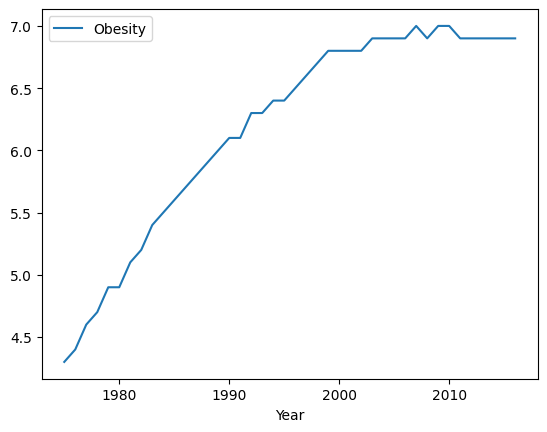

In [41]:
br_obe_df = obesity_df[obesity_df['Country'] == 'Brazil']

aux = br_obe_df[br_obe_df['Sex'] == 'Female'][['Obesity']] - br_obe_df[br_obe_df['Sex'] == 'Male'][['Obesity']]

aux.plot()

##### Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

<Axes: xlabel='Year'>

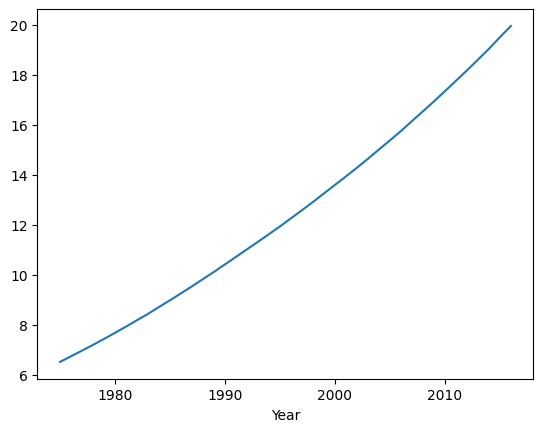

In [47]:
# aux = obesity_df["Country"].value_counts()
# display(aux)

aux = obesity_df[obesity_df['Sex'] == 'Both sexes']

aux = aux.groupby('Year')['Obesity'].mean()

aux.plot()

## Perguntas - GDP Per Person (1901-2011)

In [183]:
pib_df = get_compact_df("..\\..\\Docs\\projetos\\obesity_&_gdp_analisys\\gdp.csv")
display(pib_df)

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [184]:
pib_df['Year'] = pib_df['Year'].apply(lambda d: int(str(d).split('/')[-1]))

pib_df[' GDP_pp '] = pib_df[' GDP_pp '].apply(lambda n: float(str(n).replace(',','')))

pib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4419 entries, 0 to 4418
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   4419 non-null   object 
 1   Region    4419 non-null   object 
 2   Year      4419 non-null   int64  
 3    GDP_pp   4419 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 138.2+ KB


- Você conseguiria informar o primeiro valor registrado de cada país?

In [178]:
aux = pib_df.copy().set_index('Country')
aux = aux.loc[aux['Year'] == aux['Year'].min(), [' GDP_pp ', 'Year']]
              
display(aux)

,GDP_pp,Year
Country,,
Afghanistan,613.99,1901
Albania,1062.01,1901
Algeria,1807.76,1901
Andorra,3352.50,1901
Angola,525.76,1901
...,...,...
Venezuela,766.21,1901
Vietnam,572.96,1901
"Yemen, Rep.",729.39,1901


- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [179]:
pib_df_last_cen = pib_df[(pib_df['Year'] >= 1900) & (pib_df['Year'] < 2000)]
# aux = pib_df_last_cen.groupby('Region')[[' GDP_pp ']].max() - pib_df_last_cen.groupby('Region')[[' GDP_pp ']].min()

first_reg = pib_df_last_cen[pib_df_last_cen['Year'] == pib_df_last_cen['Year'].min()]
last_reg = pib_df_last_cen[pib_df_last_cen['Year'] == pib_df_last_cen['Year'].max()]

aux = (last_reg.groupby('Region')[[' GDP_pp ']].mean() / first_reg.groupby('Region')[[' GDP_pp ']].mean() - 1) * 100

aux.sort_values(by=' GDP_pp ', ascending=False)

,GDP_pp
Region,
"Middle East, North Africa, and Greater Arabia",857.215950
Asia,711.761516
Europe,594.046167
North America,589.760175
Central America and the Caribbean,406.426789
Australia and Oceania,396.075383
South America,312.123735
Sub-Saharan Africa,248.633780


- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [214]:
pib_df_new = pib_df.copy()

In [215]:
""" ## Captura do crescimento de GDP_pp por ano, a partir da divisão da variação de GDP pela variação dos anos """
gdp_delta = pib_df_new[' GDP_pp '] - pib_df_new[' GDP_pp '].shift()
year_delta = pib_df_new['Year'] - pib_df_new['Year'].shift()

pib_df_new["GDP_pp_Year"] = (gdp_delta / year_delta).shift(-1)
# display(pib_df_new)

In [216]:
""" ## Criando nova DF com dados dos anos ausentes """
new_data = pd.DataFrame()
for idx, row in pib_df_new.iterrows():
    for i in range(1,5):
        if row['Year'] == 2011: break
        
        add_row = row.copy()
        add_row[" GDP_pp "] += (i * add_row["GDP_pp_Year"])
        add_row["Year"] += i
        add_row['Kind'] = 'Estimated'

        new_data = pd.concat([new_data, add_row.to_frame().transpose()])

In [228]:
""" ## Concatenando os dois DFs e realizando ajustes """
pib_df_new = pib_df.copy()
pib_df_new = pd.concat([pib_df_new, new_data]).sort_values(["Country", "Year"])

pib_df_new["Kind"] = pib_df_new["Kind"].fillna("Real")
pib_df_new.index = pib_df_new['Year']
del pib_df_new['GDP_pp_Year'], pib_df_new['Year']

pib_df_new

,Country,Region,GDP_pp,Kind
Year,,,,
1901,Afghanistan,"Middle East, North Africa, and Greater Arabia",613.99,Real
1902,Afghanistan,"Middle East, North Africa, and Greater Arabia",616.0,Estimated
1903,Afghanistan,"Middle East, North Africa, and Greater Arabia",618.01,Estimated
1904,Afghanistan,"Middle East, North Africa, and Greater Arabia",620.02,Estimated
1905,Afghanistan,"Middle East, North Africa, and Greater Arabia",622.03,Estimated
...,...,...,...,...
2007,Zimbabwe,Sub-Saharan Africa,521.402,Estimated
2008,Zimbabwe,Sub-Saharan Africa,522.634,Estimated
2009,Zimbabwe,Sub-Saharan Africa,523.866,Estimated


### DESAFIOS
- Você conseguiria criar um mapa do gdp ou da obesidade no mundo ao longo dos anos?

- Há uma relação entre níveis de obesidade e gdp per capita?